In this project, we are going to use jobs related dataset to find the recommended jobs for candidates from different Industries.

In [5]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact,interact_manual
from IPython.display import display

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

In [6]:
# Importing the dataset
data = pd.read_csv('naukridataset.csv')

In [7]:
data.shape

(22000, 14)

In [8]:
data.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [9]:
# Cleaning the job location address
data['joblocation_adress'] = data['joblocation_address'].str.split(',')
pd.set_option('max_rows', 300000)
data['joblocation_adress']

0                                                [Chennai]
1                                                [Chennai]
2                                              [Bengaluru]
3        [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                              [Bengaluru]
5                                              [Bengaluru]
6        [Delhi NCR,  Mumbai,  Bengaluru,  Kochi,  Grea...
7                                              [Bengaluru]
8                                              [Bengaluru]
9                                              [Bengaluru]
10                            [Mumbai,  Delhi,  Bengaluru]
11                                             [Bengaluru]
12                                             [Bengaluru]
13                                             [Bengaluru]
14                                             [Bengaluru]
15                                             [Bengaluru]
16                                             [Bengalur

limit_output extension: Maximum message size of 10000 exceeded with 1298039 characters

In [10]:
data = data.explode('joblocation_adress')
pd.set_option('max_rows', 30000)
data['joblocation_adress'].value_counts()

Bengaluru/Bangalore                               3775
Mumbai                                            2593
Bengaluru/Bangalore                               2134
Bengaluru                                         2026
 Mumbai                                           1378
Chennai                                           1290
Hyderabad / Secunderabad                          1246
Hyderabad                                         1154
Mumbai                                            1067
 Mumbai                                            923
 Chennai                                           905
Delhi                                              790
Noida                                              777
Gurgaon                                            762
 Chennai                                           738
 Hyderabad / Secunderabad                          700
Delhi                                              680
 Pune                                              645
 Delhi    

limit_output extension: Maximum message size of 10000 exceeded with 41728 characters

In [11]:
data['joblocation_adress'] = data['joblocation_adress'].replace(('(Bengaluru/Bangalore)', ' Bangalore',
                                                                ' Bangalore ', 'Bangalore ', 'Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru/Bangalore',
                                                                 'Bengaluru/Bangalore', 'Bengaluru', 'NCR Bangalore',
                                                                 'NCR Bangalore ', 'Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka', ' Bengaluru / Bangalore',
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore', ' bangalore', ' karnataka',
                                                                 ' Bengaluru Bangalore'),
                                                                ('Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore',
                                                                'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore',
                                                                 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore',
                                                                 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore',
                                                                 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore',))

data['joblocation_adress'] = data['joblocation_adress'].replace(('Noida', 'Noida ', ' Noida', ' Delhi', 'Delhi', 'Delhi ', ' Delhi ',
                                                                 'Gurgaon', ' Gurgaon', ' Gurgaon ', 'Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida', ' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)', ' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ', 'Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida', 'Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR', 'NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR', 'NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)', 'NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR', 'Delhi/NCR ',
                                                                 ' Noida/Greater Noida', 'Greater Noida', ' Greater Noida',
                                                                 ' Greater Noida ', 'Greater Noida ', 'Ghaziabad', ' Ghaziabad',
                                                                 'Ghaziabad ', ' Ghaziabad ', 'Faridabad', 'Faridabad ',
                                                                 ' Faridabad', ' Faridabad ', ' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ', ' delhi', ' Delhi/NCR', 'Delhi NCR'
                                                                 ),
                                                                ('NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR',
                                                                'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR',
                                                                 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR',
                                                                 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR',
                                                                 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR', 'NCR',
                                                                 'NCR'))


data['joblocation_adress'] = data['joblocation_adress'].replace(('Chennai ', ' Chennai', ' Chennai ', ' Chennai',
                                                                 'chennai ', ' chennai', ' chennai ', ' chennai',),
                                                                ('Chennai', 'Chennai', 'Chennai', 'Chennai', 'Chennai',
                                                                'Chennai', 'Chennai', 'Chennai',))

data['joblocation_adress'] = data['joblocation_adress'].replace(
    ('Pune ', ' Pune', ' Pune '), ('Pune', 'Pune', 'Pune'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Kolkata ', ' Kolkata', ' Kolkata ',
                                                                ' kolkata', 'kolkata ', ' kolkata'),
                                                                ('Kolkata', 'Kolkata', 'Kolkata',
                                                                 'Kolkata', 'Kolkata', 'Kolkata'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Ahmedabad', 'Ahmedabad ', ' Ahmedabad '), ('Ahmedabad',
                                                                                                              'Ahmedabad', 'Ahmedabad'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Chandigarh ', ' Chandigarh', ' Chandigarh '),
                                                                ('Chandigarh', 'Chandigarh', 'Chandigarh'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Surat ', ' Surat', ' Surat '),
                                                                ('Surat', 'Surat', 'Surat'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Hyderabad / Secunderabad', ' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ', 'Hyderabad / Secunderabad ',
                                                                ' Hyderabad', 'Hyderabad ', ' Hyderabad ',
                                                                 'Hyderabad/Secunderabad', 'Hyderabad/Secunderabad ',
                                                                 ' Hyderabad/Secunderabad ', ' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad',
                                                                 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad',
                                                                'Hyderabad', 'Hyderabad', 'Hyderabad'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('NAVI MUMBAI', ' NAVI MUMBAI', 'NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI', ' NAVI MUMBAI ', 'Mumbai , Mumbai',
                                                                 ' Mumbai', ' Mumbai ', 'Mumbai ', 'mumbai', 'Navi Mumbai',
                                                                ' Navi Mumbai', ' Navi Mumbai ', 'Navi Mumbai ',
                                                                 ' Mumbai Suburbs', 'Mumbai Suburbs ', 'Mumbai Suburbs',
                                                                 ' Mumbai Suburbs ', 'mumbai', ' mumbai', 'mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai',
                                                                 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai',
                                                                'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai',
                                                                 'Mumbai', 'Mumbai', 'Mumbai'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ', ' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ',
                                                                 ' Ernakulam / Kochi/ Cochin', ' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi', 'Kochi', 'Kochi', 'Kochi', 'Kochi', 'Kochi', 'Kochi',
                                                                 'Kochi',))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Coimbatore ', ' Coimbatore', ' Coimbatore '),
                                                                ('Coimbatore', 'Coimbatore', 'Coimbatore'))

data['joblocation_adress'] = data['joblocation_adress'].replace(('Lucknow ', ' Lucknow', ' Lucknow '),
                                                                ('Lucknow', 'Lucknow', 'Lucknow'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Jaipur ', ' Jaipur', ' Jaipur ', 'jaipur ', ' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur', 'Jaipur', 'Jaipur', 'Jaipur', 'Jaipur', 'Jaipur'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Vijayawada ', ' Vijayawada', ' Vijayawada '),
                                                                ('Vijayawada', 'Vijayawada', 'Vijayawada'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Coimbatore ', ' Coimbatore', ' Coimbatore '),
                                                                ('Coimbatore', 'Coimbatore', 'Coimbatore'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Visakhapatnam ', ' Visakhapatnam', ' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ', ' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam',
                                                                 'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam',
                                                                 ))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Bhubaneshwar', ' Bhubaneshwar', ' Bhubaneshwar '),
                                                                ('Bhubaneshwar', 'Bhubaneshwar', 'Bhubaneshwar'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Patna', ' Patna', ' Patna '),
                                                                ('Patna', 'Patna', 'Patna'))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Trivandrum', ' Trivandrum', ' Trivandrum '),
                                                                ('Trivandrum', 'Trivandrum', 'Trivandrum'))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Mangalore', ' Mangalore', ' Mangalore '),
                                                                ('Mangalore', 'Mangalore', 'Mangalore'))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Thane', ' Thane', ' Thane '),
                                                                ('Thane', 'Thane', 'Thane'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Bhopal', ' Bhopal', ' Bhopal '),
                                                                ('Bhopal', 'Bhopal', 'Bhopal'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Vadodara/Baroda', ' Vadodara/Baroda', ' Vadodara/Baroda ',
                                                                ' Vadodara', 'Vadodara ', ' Vadodara '),
                                                                ('Vadodara', 'Vadodara', 'Vadodara', 'Vadodara',
                                                                 'Vadodara', 'Vadodara',))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Indore', ' Indore', ' Indore '),
                                                                ('Indore', 'Indore', 'Indore'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Guwahati', ' Guwahati', ' Guwahati '),
                                                                ('Guwahati', 'Guwahati', 'Guwahati'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Nagpur', ' Nagpur', ' Nagpur '),
                                                                ('Nagpur', 'Nagpur', 'Nagpur'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Raipur', ' Raipur', ' Raipur '),
                                                                ('Raipur', 'Raipur', 'Raipur'))

pd.set_option('max_rows', 2400)
data['joblocation_adress'].value_counts()

Bangalore                                         9963
NCR                                               8668
Mumbai                                            6403
Hyderabad                                         4570
Chennai                                           3373
Pune                                              1227
Kolkata                                            543
Ahmedabad                                          404
Chandigarh                                         189
Kochi                                              140
Coimbatore                                         136
Jaipur                                             131
Visakhapatnam                                      125
Surat                                              106
Lucknow                                            101
Vijayawada                                          84
Bhubaneshwar                                        74
Trivandrum                                          69
Vadodara  

limit_output extension: Maximum message size of 10000 exceeded with 34248 characters

In [12]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

counts = data['joblocation_adress'].value_counts()
data = data.loc[data['joblocation_adress'].isin(counts.index[counts > 25])]
display(data['joblocation_adress'].value_counts())

Bangalore        9963
NCR              8668
Mumbai           6403
Hyderabad        4570
Chennai          3373
Pune             1227
Kolkata           543
Ahmedabad         404
Chandigarh        189
Kochi             140
Coimbatore        136
Jaipur            131
Visakhapatnam     125
Surat             106
Lucknow           101
Vijayawada         84
Bhubaneshwar       74
Trivandrum         69
Vadodara           65
Indore             63
Mangalore          57
Thane              48
Nagpur             45
Bhopal             42
Guwahati           39
Raipur             32
Patna              26
Name: joblocation_adress, dtype: int64

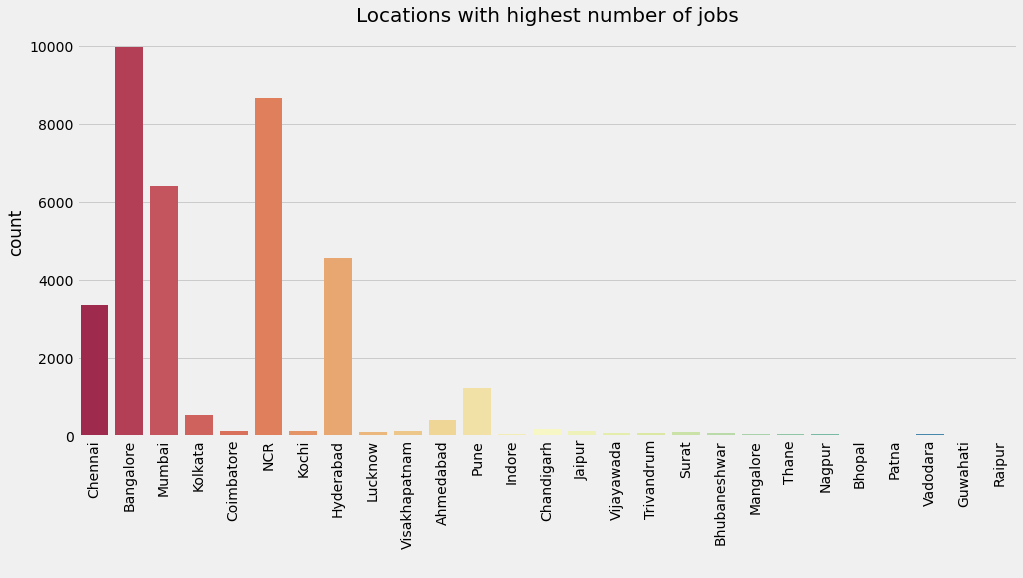

In [14]:
sns.countplot(data['joblocation_adress'], palette = 'Spectral')
plt.title('Locations with highest number of jobs', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()

In [15]:
# Cleaning the Experience Column
data['experience']

0          0 - 1 yrs
1          0 - 0 yrs
2          4 - 8 yrs
3        11 - 15 yrs
3        11 - 15 yrs
            ...     
21996      3 - 5 yrs
21997      2 - 4 yrs
21998     7 - 12 yrs
21998     7 - 12 yrs
21999     5 - 10 yrs
Name: experience, Length: 36723, dtype: object

In [16]:
pd.set_option('max_rows', 40000)
data['experience'].str.split(' ')

0          [0, -, 1, yrs]
1          [0, -, 0, yrs]
2          [4, -, 8, yrs]
3        [11, -, 15, yrs]
3        [11, -, 15, yrs]
3        [11, -, 15, yrs]
3        [11, -, 15, yrs]
3        [11, -, 15, yrs]
4          [6, -, 8, yrs]
5          [2, -, 5, yrs]
6          [1, -, 3, yrs]
6          [1, -, 3, yrs]
6          [1, -, 3, yrs]
6          [1, -, 3, yrs]
6          [1, -, 3, yrs]
6          [1, -, 3, yrs]
6          [1, -, 3, yrs]
6          [1, -, 3, yrs]
7          [2, -, 7, yrs]
8          [1, -, 3, yrs]
9          [1, -, 5, yrs]
10         [1, -, 3, yrs]
10         [1, -, 3, yrs]
10         [1, -, 3, yrs]
11         [4, -, 8, yrs]
12         [2, -, 4, yrs]
13         [3, -, 8, yrs]
14         [1, -, 5, yrs]
15         [5, -, 7, yrs]
16         [1, -, 2, yrs]
17         [2, -, 4, yrs]
18        [5, -, 10, yrs]
19         [0, -, 1, yrs]
20         [1, -, 5, yrs]
21        [5, -, 10, yrs]
22         [3, -, 8, yrs]
23        [6, -, 10, yrs]
24       [10, -, 12, yrs]
25         [

limit_output extension: Maximum message size of 10000 exceeded with 954829 characters

In [17]:
data['experience'] = data['experience'].str.split(" ")
data['Min Experience'] = data['experience'].apply(lambda x: x[0])
data['Max Experience'] = data['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])

In [18]:
data['Min Experience'].value_counts()

2      7301
0      6340
3      5343
1      4490
5      3329
4      3135
6      1530
10     1430
8      1292
7      1048
9       486
12      315
15      285
Not     111
11       75
13       74
14       63
20       26
18       25
16       16
17        6
23        1
25        1
26        1
Name: Min Experience, dtype: int64

In [19]:
data['Max Experience'].value_counts()

5            6458
7            4494
8            3740
6            3303
3            3233
10           2860
4            2664
9            1815
2            1597
12           1085
1            1064
11           1059
15            834
13            682
20            501
0             358
14            251
18            134
Mentioned     111
16            109
17             94
22             85
25             85
19             27
23             26
24             20
21             12
30             11
28              8
-1              1
27              1
26              1
Name: Max Experience, dtype: int64

In [20]:
data['Min Experience'] = data['Min Experience'].replace('Not',0)
data['Max Experience'] = data['Max Experience'].replace(('Mentioned','-1'), (5,5))

In [21]:
data['Min Experience'] = data['Min Experience'].astype('int')
data['Max Experience'] = data['Max Experience'].astype('int')

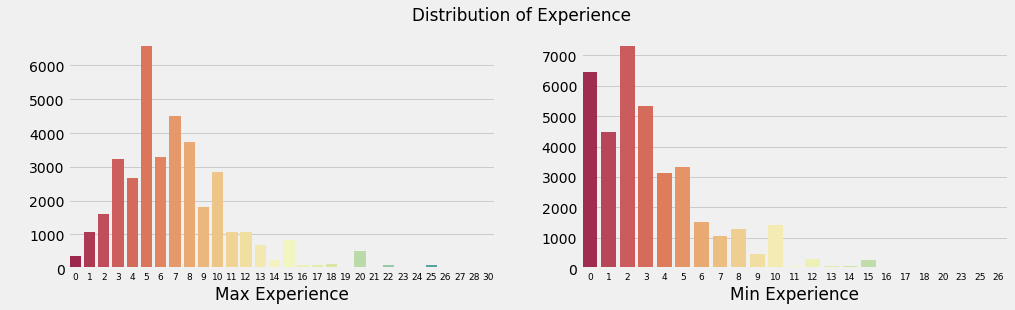

In [22]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.countplot(data['Max Experience'], palette = 'Spectral')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.subplot(1, 2, 2)
sns.countplot(data['Min Experience'], palette = 'Spectral')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.suptitle('Distribution of Experience')
plt.show()

In [23]:
# Cleaning the Education Column
data['education']

0        UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1        UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2        UG: Any Graduate - Any Specialization PG:Any P...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
3        UG: Any Graduate - Any Specialization PG:CA Do...
4        UG: B.Tech/B.E. - Any Specialization PG:Any Po...
5        UG: B.Tech/B.E. - Any Specialization PG:MCA - ...
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      NaN
6                                                      N

limit_output extension: Maximum message size of 10000 exceeded with 2166687 characters

In [24]:
data['education'] = data['education'].fillna('UG: Any Graduate - Any Specialization')
data['education'].isnull().sum()

0

In [25]:
data['Education'] = data['education'].str.split(' ')
data['Education'] = data['Education'].apply(lambda x: x[1] if len(x) > 1 else x[0])

data['Education'].value_counts(dropna = False)

Any                    24216
B.Tech/B.E.             8835
B.Com                    647
B.Sc                     544
Diploma                  441
Graduation               397
B.B.A                    267
B.A                      240
BCA                      174
MBBS                     155
BDS                      109
B.Pharma                  97
Other                     86
B.Ed                      85
LLB                       71
Not                       54
-                         54
BHM                       54
Doctorate                 49
B.Arch                    37
B.Tech/B.E.,              23
B.Sc,                     21
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
Diploma,                   5
B.Com,                     5
BCA,                       3
BVSC                       3
B.A,                       3
B.B.A,                     2
MBA/PGDM                   2
PG:Other                   1
B.Des.        

In [26]:
data['Education'] = data['Education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,','Postgraduate',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA',
                                              'B.Tech','Doctorate','B.Tech'))

data['Education'].value_counts()

Any          24216
B.Tech        9464
B.Com          652
B.Sc           565
Diploma        446
B.B.A          267
B.A            243
BCA            177
MBBS           155
BDS            109
B.Pharma       104
B.Ed            85
LLB             71
Doctorate       58
BHM             54
B.Arch          37
CA              10
BVSC             3
MBA              2
BBA              2
B.Des.           1
BAMS             1
BFA              1
Name: Education, dtype: int64

Any          24216
B.Tech        9464
B.Com          652
B.Sc           565
Diploma        446
B.B.A          267
B.A            243
BCA            177
MBBS           155
BDS            109
B.Pharma       104
B.Ed            85
LLB             71
Doctorate       58
BHM             54
B.Arch          37
Name: Education, dtype: int64

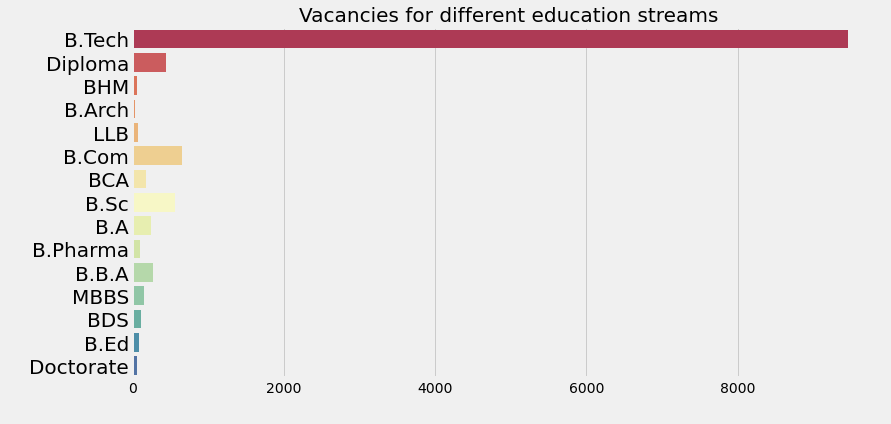

In [27]:
counts = data['Education'].value_counts()
data = data.loc[data['Education'].isin(counts.index[counts >= 25])]
display(data['Education'].value_counts())

plt.rcParams['figure.figsize'] = (12,6)
x = data[data['Education'] != 'Any']
sns.countplot(y = x['Education'], palette = 'Spectral')
plt.title('Vacancies for different education streams', fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [28]:
# Cleaning the Industry Column
data['industry']

0                         Media / Entertainment / Internet
1                 Advertising / PR / MR / Event Management
2                          IT-Software / Software Services
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
3                   Banking / Financial Services / Broking
4                          IT-Software / Software Services
5                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Services
6                          IT-Software / Software Servic

limit_output extension: Maximum message size of 10000 exceeded with 2165506 characters

In [29]:
data['industry'].str.split(' / ')

0                         [Media, Entertainment, Internet]
1                  [Advertising, PR, MR, Event Management]
2                         [IT-Software, Software Services]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
3                   [Banking, Financial Services, Broking]
4                         [IT-Software, Software Services]
5                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Services]
6                         [IT-Software, Software Service

limit_output extension: Maximum message size of 10000 exceeded with 2165506 characters

In [30]:
data['industry'].isnull().sum()

1

In [31]:
data['industry'] = data['industry'].fillna(data['industry'].mode()[0])

data['industry'].isnull().sum()

0

In [32]:
data['Industry'] = data['industry'].str.split(' / ')
data['Industry'] = data['Industry'].apply(lambda x: x[0])

In [33]:
display(data['Industry'].value_counts())

IT-Software                 14695
BPO                          2321
Banking                      2111
Education                    1726
Recruitment                  1538
Automobile                   1170
Pharma                       1022
Internet                     1021
Construction                  952
Medical                       873
Travel                        733
Industrial Products           607
Other                         548
Accounting                    547
Strategy                      517
Advertising                   472
IT-Hardware & Networking      442
Media                         426
FMCG                          426
Insurance                     400
Retail                        370
Oil and Gas                   347
Telecom/ISP /                 316
Real Estate                   306
Consumer Electronics          268
Semiconductors                249
Electricals                   243
Textiles                      194
Courier                       183
KPO           

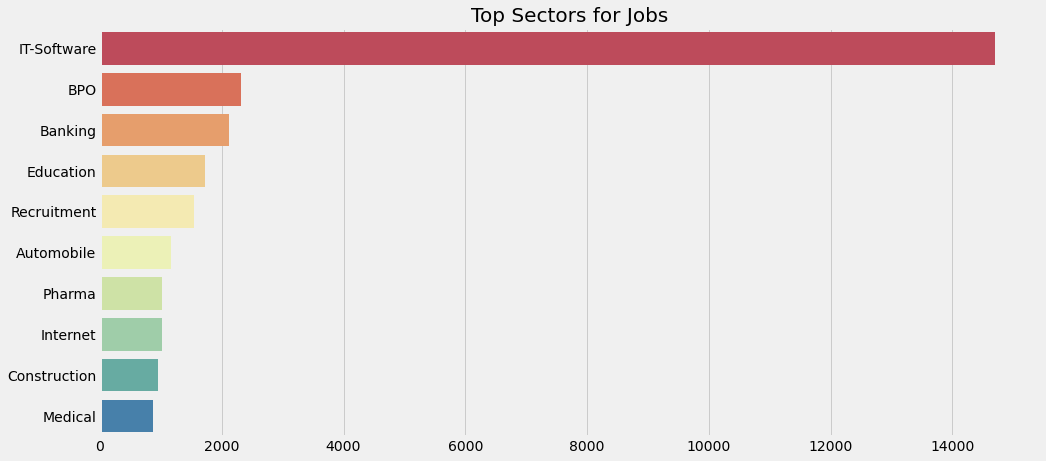

In [34]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Top Sectors for Jobs', fontsize = 20)
sns.barplot(y = data['Industry'].value_counts().head(10).index,
            x = data['Industry'].value_counts().head(10).values,
            palette = 'Spectral')
plt.show()

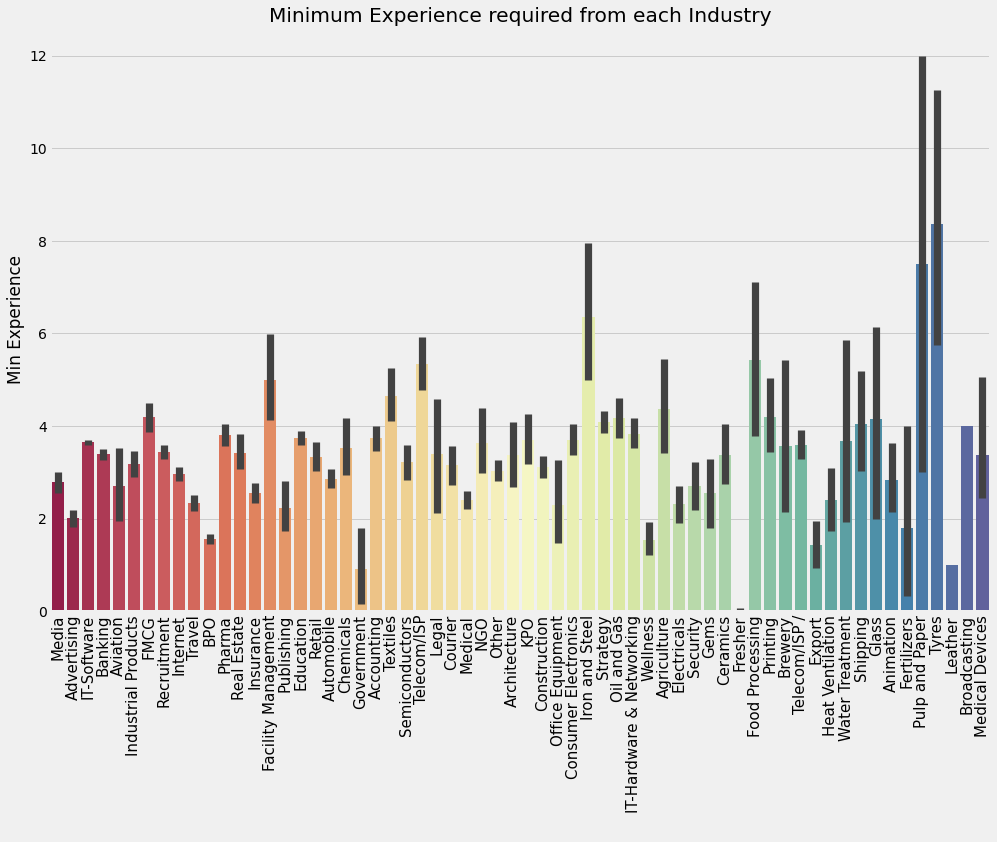

In [35]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Minimum Experience required from each Industry')
sns.barplot(data['Industry'], data['Min Experience'], palette = 'Spectral')
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel(' ')
plt.show()

In [36]:
# Cleaning the Skills Column
data['skills']

0                                           ITES
1                                      Marketing
2          IT Software - Application Programming
3                                       Accounts
3                                       Accounts
3                                       Accounts
3                                       Accounts
3                                       Accounts
4          IT Software - Application Programming
5          IT Software - Application Programming
6          IT Software - Application Programming
6          IT Software - Application Programming
6          IT Software - Application Programming
6          IT Software - Application Programming
6          IT Software - Application Programming
6          IT Software - Application Programming
6          IT Software - Application Programming
6          IT Software - Application Programming
7                                     Production
8                                     Production
9                   

limit_output extension: Maximum message size of 10000 exceeded with 1798474 characters

In [37]:
data['skills'].isnull().sum()

803

In [38]:
data['skills'] = data['skills'].fillna(data['skills'].mode()[0])

In [39]:
data['Skills'] = data['skills'].str.split(" - ")
data['Skills'] = data['Skills'].apply(lambda x: x[1] if len(x) > 1 else x[0])
display(data['Skills'].value_counts())

Application Programming              9983
Sales                                5932
ITES                                 2952
Production                           1587
Accounts                             1529
HR                                   1455
Teaching                             1351
Marketing                            1327
Medical                               817
Financial Services                    749
Site Engineering                      672
Other                                 634
Engineering Design                    624
ERP                                   564
eCommerce                             529
Network Administration                507
QA & Testing                          479
IT Hardware                           466
Journalism                            427
DBA                                   424
Supply Chain                          379
Embedded                              368
Design                                342
Hotels                            

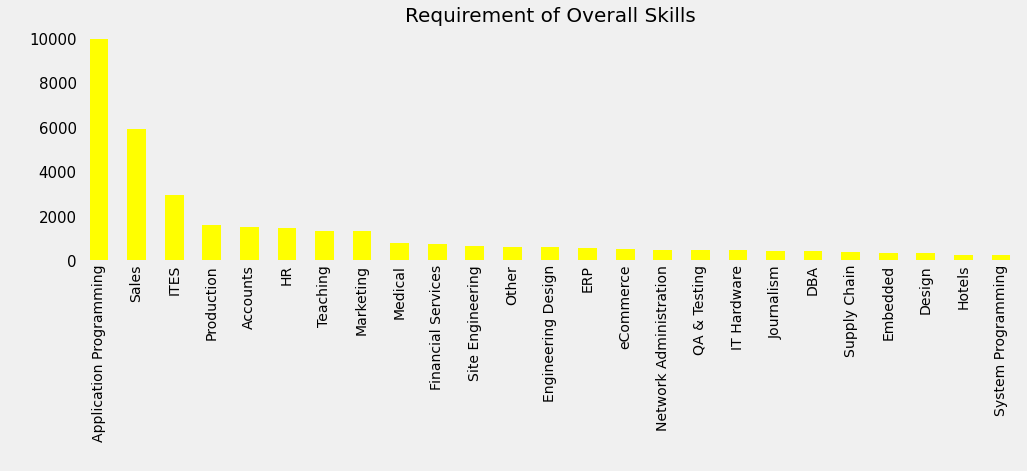

In [40]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.title('Requirement of Overall Skills', fontsize = 20)
data['Skills'].value_counts().head(25).plot(kind = 'bar', color = 'yellow')
plt.grid()
plt.yticks(fontsize = 15)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [41]:
data[['Skills','numberofpositions']].groupby(['Skills']).agg('sum').sort_values(by = 'numberofpositions',
                                 ascending = False).head(15).style.background_gradient(cmap = 'Spectral')

,numberofpositions
Skills,
ITES,523255.000000
Medical,90340.000000
Sales,42947.000000
Application Programming,41499.000000
Travel,40040.000000
Marketing,15715.000000
Production,11038.000000
HR,5900.000000
Accounts,4580.000000


In [42]:
# Cleaning rest of the columns
data.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id',
       'joblocation_adress', 'Min Experience', 'Max Experience', 'Education',
       'Industry', 'Skills'],
      dtype='object')

In [43]:
# Removing unwanted columns
data = data.drop(['education',
                  'joblocation_address',
                  'experience',
                  'industry',
                  'skills',
                  'jobid',
                  'uniq_id',
                  'site_name'], axis = 1)

data.columns

Index(['company', 'jobdescription', 'jobtitle', 'numberofpositions', 'payrate',
       'postdate', 'joblocation_adress', 'Min Experience', 'Max Experience',
       'Education', 'Industry', 'Skills'],
      dtype='object')

In [44]:
data.isnull().sum()

company                   0
jobdescription            0
jobtitle                  0
numberofpositions     27818
payrate                  93
postdate                 29
joblocation_adress        0
Min Experience            0
Max Experience            0
Education                 0
Industry                  0
Skills                    0
dtype: int64

In [45]:
data['numberofpositions'] = data['numberofpositions'].fillna(1)
data['numberofpositions'] = data['numberofpositions'].astype('int')

In [46]:
# Removing missing jobpost date and payrate details
data = data.dropna()
data.isnull().sum().sum()

0

In [47]:
data['postdate']

0        2016-05-21 19:30:00 +0000
1        2016-05-21 19:30:00 +0000
2        2016-10-13 16:20:55 +0000
3        2016-10-13 16:20:55 +0000
3        2016-10-13 16:20:55 +0000
3        2016-10-13 16:20:55 +0000
3        2016-10-13 16:20:55 +0000
3        2016-10-13 16:20:55 +0000
4        2016-10-13 16:20:55 +0000
5        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
6        2016-10-13 16:20:55 +0000
7        2016-10-13 16:20:55 +0000
8        2016-10-13 16:20:55 +0000
9        2016-10-13 16:20:55 +0000
10       2016-10-13 16:20:55 +0000
10       2016-10-13 16:20:55 +0000
10       2016-10-13 16:20:55 +0000
11       2016-10-13 16:20:55 +0000
12       2016-10-13 16:20:55 +0000
13       2016-10-13 16:20:55 +0000
14       2016-10-13 16:20:55 +0000
15       2016-10-13 

limit_output extension: Maximum message size of 10000 exceeded with 1280364 characters

In [48]:
data['postdate'] = data['postdate'].str.split(" ")
data['postdate'] = data['postdate'].apply(lambda x: x[0])
data['postdate'].head()

0    2016-05-21
1    2016-05-21
2    2016-10-13
3    2016-10-13
3    2016-10-13
Name: postdate, dtype: object

In [49]:
#Removing all the duplicates
print("Number of rows before removing duplicates: ",data.shape[0])
data.drop_duplicates(subset = None, keep = 'first', inplace = True)
print("Number of rows after removing duplicates: ",data.shape[0])

Number of rows before removing duplicates:  36581
Number of rows after removing duplicates:  32137


In [50]:
#Now the cleaning is complete,lets provide the important information available
data['company'].nunique()

8278

In [51]:
data['jobtitle'].nunique()

17083

In [52]:
data['Industry'].nunique()

62

In [53]:
data['joblocation_adress'].nunique()

27

In [54]:
data['Skills'].nunique()

45

In [55]:
data['numberofpositions'].sum()

588065

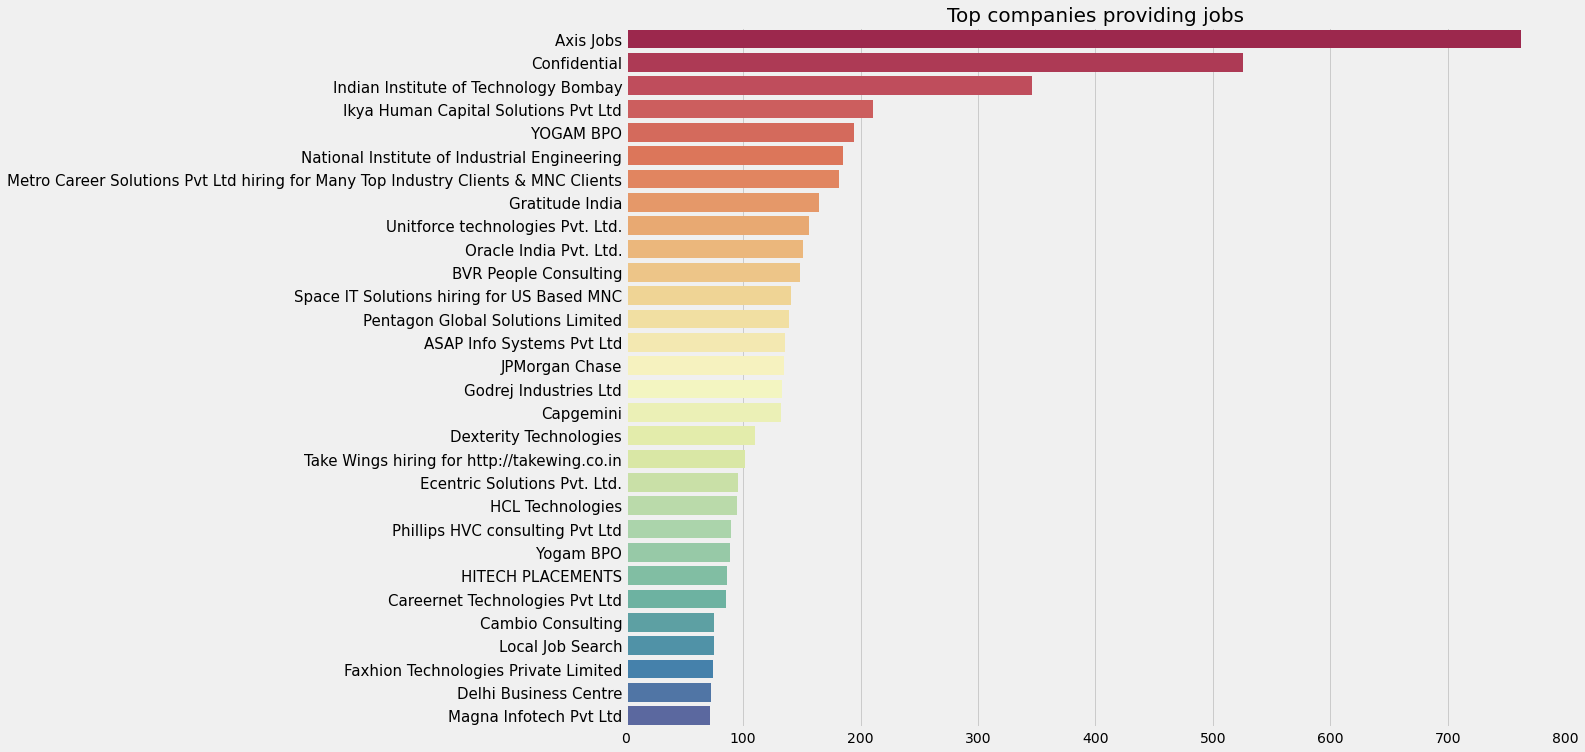

In [56]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.barplot(y = data['company'].value_counts().head(30).index,
            x = data['company'].value_counts().head(30).values,
            palette = 'Spectral')
plt.title('Top companies providing jobs', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [57]:
pd.set_option('max_rows', 150)
@interact

def check(City = list(data['joblocation_adress'].value_counts().index),
          Industry = list(data['Industry'].value_counts().index),
          Experience = list(data['Min Experience'].value_counts().sort_values(ascending = False).index),
          Vacancies = 10
          ):
    return data.loc[(data['numberofpositions'] > Vacancies)
                   & (data['joblocation_adress'] == City)
                   & (data['Industry'] == Industry)
                   & (data['Min Experience'] == Experience)][[
                                                      'company',
                                                      'jobtitle',
                                                      'Education',
                                                      'payrate',
                                                      'numberofpositions',
                                                      ]]

interactive(children=(Dropdown(description='City', options=('Bangalore', 'NCR', 'Mumbai', 'Hyderabad', 'Chenna…

In [58]:
# Correlation between skills vs jobtitle for predicting the best suited job titles with respect to the skill
x = pd.crosstab(data['Education'],data['Industry'])
x

Industry,Accounting,Advertising,Agriculture,Animation,Architecture,Automobile,Aviation,BPO,Banking,Brewery,...,Semiconductors,Shipping,Strategy,Telecom/ISP,Telecom/ISP /,Textiles,Travel,Tyres,Water Treatment,Wellness
Education,,,,,,,,,,,,,,,,,,,,,
Any,371,300,50,12,49,758,17,1525,1479,7,...,124,34,357,87,174,137,488,7,11,76
B.A,1,7,0,0,2,0,0,1,0,0,...,0,0,4,1,0,1,1,0,0,4
B.Arch,0,0,0,0,14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B.B.A,3,4,0,0,0,4,0,6,19,0,...,1,0,0,0,2,0,12,0,0,0
B.Com,74,5,1,1,0,16,0,34,97,0,...,3,0,25,0,11,6,14,0,0,0
B.Ed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B.Pharma,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
B.Sc,7,0,1,0,0,1,1,10,5,0,...,1,1,0,0,0,0,13,0,0,3
B.Tech,49,54,8,7,16,266,15,287,265,0,...,95,2,87,29,84,13,43,1,3,10


In [59]:
@interact
def recommendation_jobs(Industry = list(data['Industry'].value_counts().index)):
    job = x[Industry]
    similar_jobs = x.corrwith(job)
    similar_jobs = similar_jobs.sort_values(ascending=False)
    similar_jobs = similar_jobs.iloc[2:]
    return similar_jobs.head(3)

interactive(children=(Dropdown(description='Industry', options=('IT-Software', 'BPO', 'Banking', 'Education', …

By now, we have cleaned and analysed the data as well as build function for searching and filtering jobs for certain criteria